***We analyze the effect and impact of interactions among drugs to treat COVID-19 and the most common pre-existing conditions.***

## Install requirements

In [ ]:
%%capture
!pip install pandas SPARQLWrapper plotly

## Import library to traverse the Knowledge Graph

In [1]:
import requests
import plotly.express as px
import ipywidgets as widgets

content = 'https://raw.githubusercontent.com/SDM-TIB/COVID_medical_condition/main/'
url = content+'traverse_kg.py'
# Send the request to GitHub to get the file content
response = requests.get(url)

# Check if the request was successful
if response.status_code == 200:
    # Get the content of the file
    file_content = response.text
    
    # Define a dictionary to hold the module's global variables
    module_globals = {}
    
    # Execute the file content in the dictionary's context
    exec(file_content, module_globals)
else:
    print(f'Failed to download the file: {response.status_code}')

## Add the endpoint

In [2]:
endpoint = 'https://labs.tib.eu/sdm/covid19kg/sparql'

## Add list of drugs to study. Include the drug bank ID separate by coma

**Comorbidity drug list. It's possible to add new comorbidity drugs or edit the predefined comorbidity drugs.**

In [3]:
comorbidity_drug={}
#comorbidity_drug['asthma'] = ['DB00635', 'DB00959','DB00938', 'DB00764', 'DB00471']
#comorbidity_drug['hypertensive'] = ['DB00584', 'DB00691','DB01197', 'DB01193', 'DB00373']
#comorbidity_drug['diebetes'] = ['DB01132', 'DB01016','DB01261', 'DB00331', 'DB00912']

comorbidity_drug['asthma'] = ['DB00471']
comorbidity_drug['hypertensive'] = ['DB00641']
comorbidity_drug['diebetes'] = ['DB01016']


**COVID Drug list. It's possible to add new COVID drugs or edit the predefined drugs.**

In [4]:
covid_drug = ['DB01611','DB00207','DB00608']

## Select the comorbidity to study

In [5]:
dropdown_comorbidity = widgets.Dropdown(options = comorbidity_drug, description='Comorbidity:')
display(dropdown_comorbidity)

Dropdown(description='Comorbidity:', options={'asthma': ['DB00471'], 'hypertensive': ['DB00641'], 'diebetes': …

# Traverse the KG and get the Drug-Drug Interactions given a Treatment


In [6]:
get_ddi = module_globals['get_ddi']
asymmetric_ddi, cov_ddi = get_ddi(endpoint, dropdown_comorbidity.value, covid_drug)
display(asymmetric_ddi.shape, asymmetric_ddi.head())

(7, 3)

precipitant_label  object_label            effect_impact
0  hydroxychloroquine   chloroquine      metabolism_decrease
1  hydroxychloroquine  azithromycin    prolonged_qt_increase
3         montelukast   chloroquine        myopathy_increase
5         montelukast   chloroquine   myoglobinuria_increase
7         montelukast   chloroquine  rhabdomyolysis_increase

In [7]:
get_drug_label = module_globals['get_drug_label']
set_drug = get_drug_label(endpoint, covid_drug)

url = content+'library_plot_ddi.py'
# Send the request to GitHub to get the file content
response = requests.get(url)

# Check if the request was successful
if response.status_code == 200:
    # Get the content of the file
    file_content = response.text
    
    # Define a dictionary to hold the module's global variables
    module_globals = {}
    
    # Execute the file content in the dictionary's context
    exec(file_content, module_globals)
else:
    print(f'Failed to download the file: {response.status_code}')

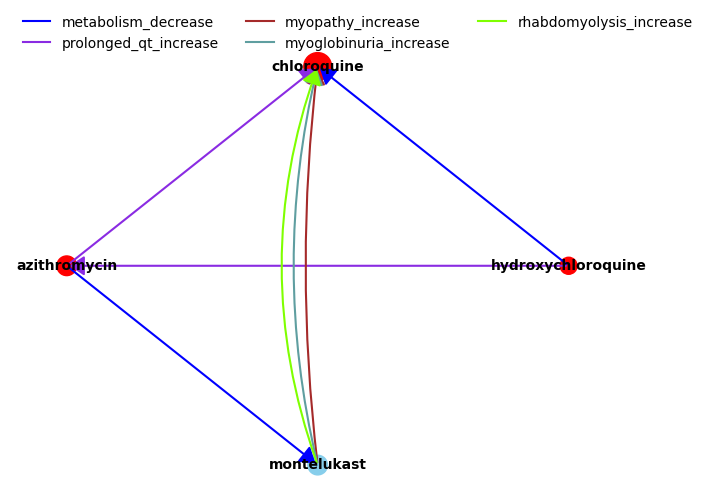

In [8]:
plot_graph = module_globals['plot_graph']
plot_graph(asymmetric_ddi, set_drug, 'plot_name')

# Plot Sunburst DDIs

The Sunburst plot has three levels. From the inside out, the first one represents the precipitant drug, the second one represents the object drug and the last one shows the type of interaction.

In [9]:
fig = px.sunburst(asymmetric_ddi, path=['precipitant_label', 'object_label', 'effect_impact'], color='precipitant_label')
fig.show()